<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB
None
   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Ca

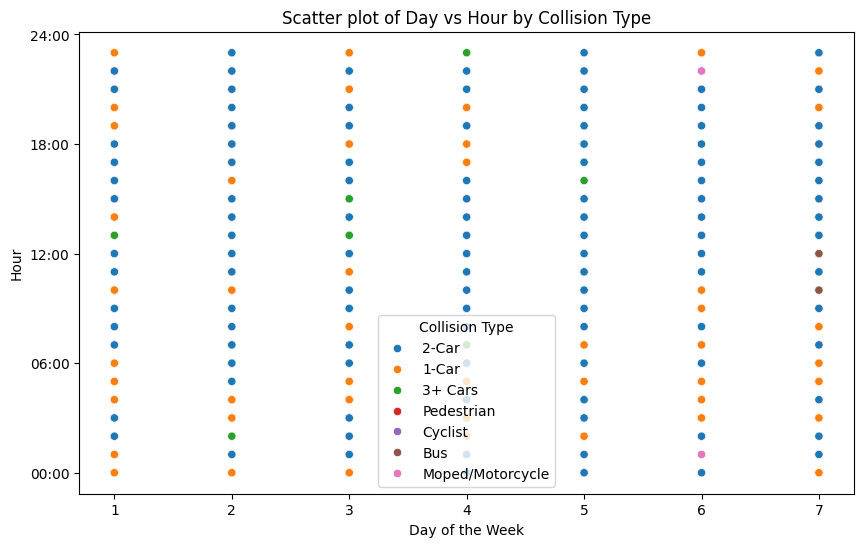

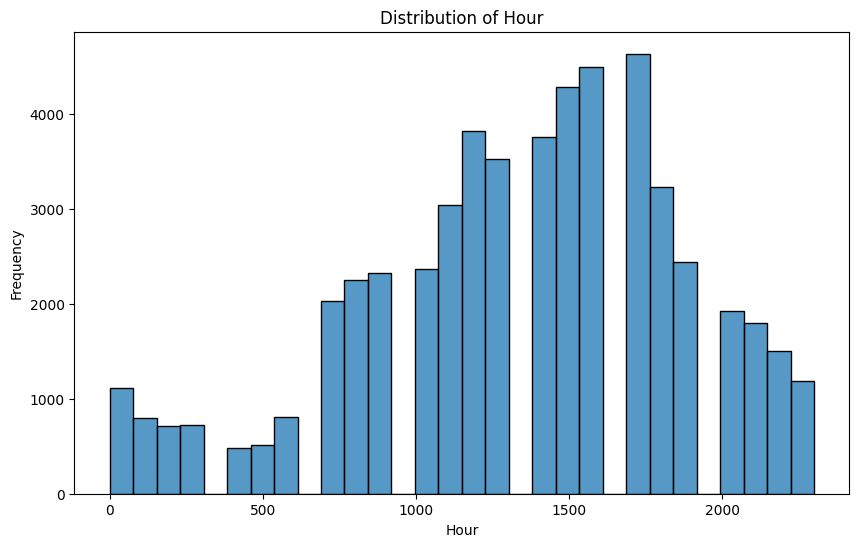

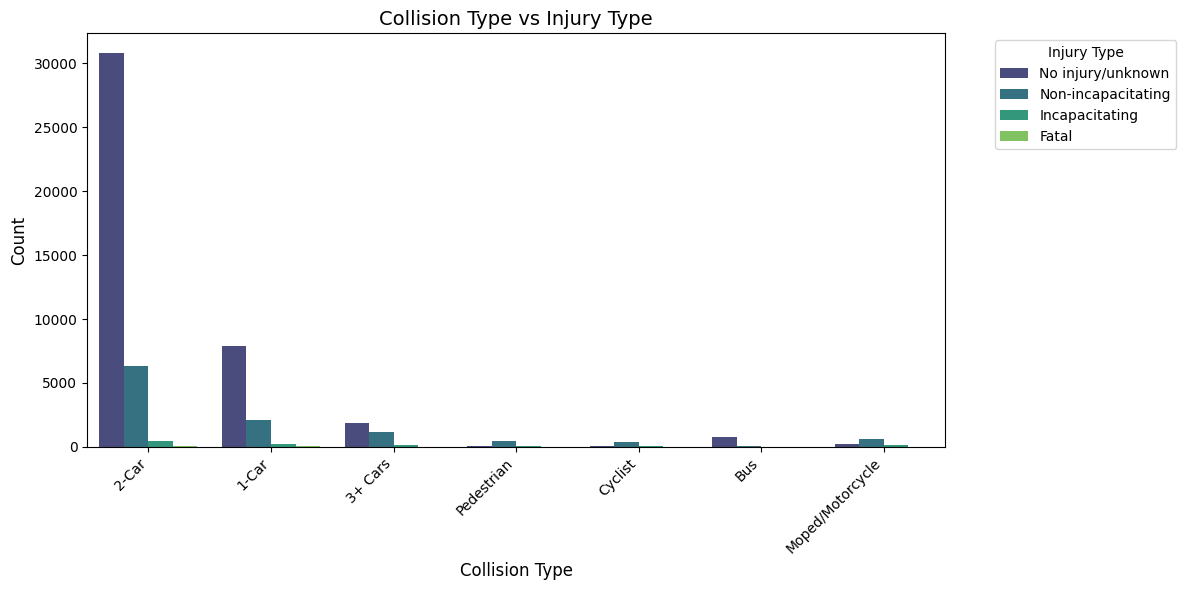

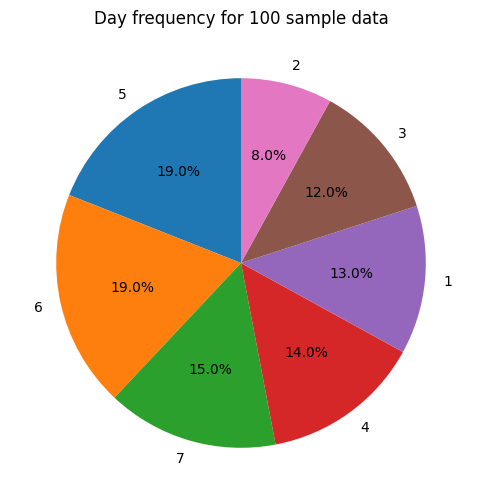

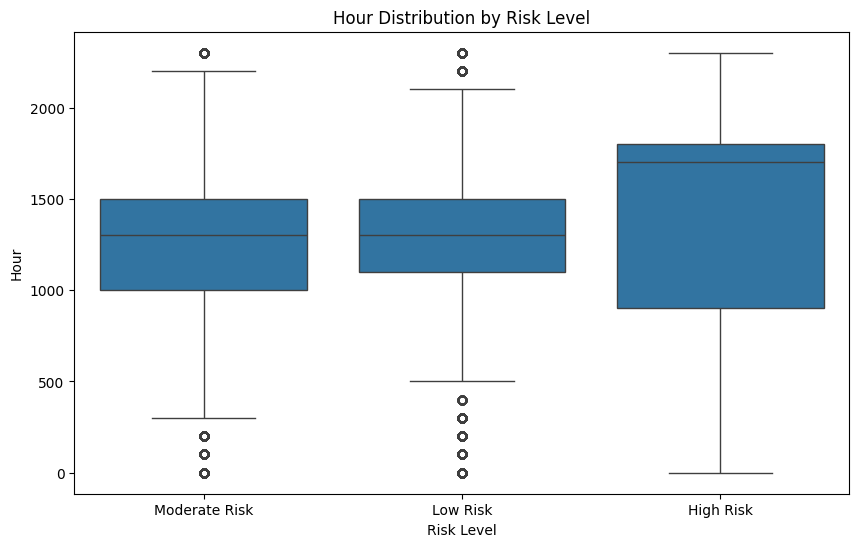


Missing values in each column:
 Year                 0
Month                0
Day                  0
Weekend?            68
Hour               225
Collision Type       6
Injury Type          0
Primary Factor    1121
Latitude            30
Longitude           30
Risk Level           0
dtype: int64

Total number of missing values:
 1480

Missing values after imputation:
 Year              0
Month             0
Day               0
Weekend?          0
Hour              0
Collision Type    0
Injury Type       0
Primary Factor    0
Latitude          0
Longitude         0
Risk Level        0
dtype: int64

Mean:
 Year         2008.968059
Month           6.662162
Day             4.196912
Hour         1347.265349
Latitude       35.582109
Longitude     -78.619224
dtype: float64

Median:
 Year         2009.000000
Month           7.000000
Day             4.000000
Hour         1400.000000
Latitude       39.164430
Longitude     -86.530992
dtype: float64

Variance:
 Year             14.362277
Month  

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Selected Features based on RFE:
 Index(['Weekend?', 'Hour', 'Injury Type', 'Latitude', 'Longitude', 'Hour_Bin'], dtype='object')

Feature Ranking:
 [6 5 3 1 1 2 1 4 1 1 1]
Selected Features based on L1 Regularization: Index(['Primary Factor'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            53943 non-null  int64  
 1   Month           53943 non-null  int64  
 2   Day             53943 non-null  int64  
 3   Weekend?        53943 non-null  int64  
 4   Hour            53943 non-null  float64
 5   Collision Type  53943 non-null  int64  
 6   Injury Type     53943 non-null  int64  
 7   Primary Factor  53943 non-null  int64  
 8   Latitude        53943 non-null  float64
 9   Longitude       53943 non-null  float64
 10  Risk Level      53943 non-null  object 
 11  Hour_Bin        53943 non-null  int64  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.model_selection import train_test_split

# Load dataset
data1 = pd.read_csv("/workspaces/IT326/Dataset/monroe county car crach 2003-2015.csv", encoding="windows-1252")  
df = pd.DataFrame(data1) 

# Display basic information about the dataset
print(df.info())  # Display the summary of the dataset (e.g., data types and non-null counts)
print(df.head())  # Display the first few rows of the dataset
print(df.describe())  # Show statistical summaries of numeric columns


# Function to classify collision risk based on 'Hour', 'Weekend?', and 'Injury Type'
def classify_collision(row):
    if (row['Hour'] >= 1600 and row['Hour'] <= 2000) or (row['Hour'] >= 700 and row['Hour'] <= 900) or row['Weekend?'] == 'Weekend' and row['Injury Type'] == 'Incapacitating':
        return 'High Risk'
    elif row['Injury Type'] == 'No injury/unknown':
        return 'Moderate Risk'
    else:
        return 'Low Risk'


# Apply the function to create a new column 'Risk Level' for classification
data1['Risk Level'] = data1.apply(classify_collision, axis=1)


# Data visualizations

# Scatter plot: Day vs Hour, colored by Collision Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day', y='Hour', data=data1, hue='Collision Type')
plt.title('Scatter plot of Day vs Hour by Collision Type')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.yticks([0, 600, 1200, 1800, 2400], ['00:00', '06:00', '12:00', '18:00', '24:00'])  # Custom y-axis labels
plt.show()

# Histogram: Distribution of Hour
plt.figure(figsize=(10, 6))
sns.histplot(data1['Hour'], bins=30)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

# Bar plot: Collision Type vs Injury Type
plt.figure(figsize=(12, 6))
sns.countplot(data=data1, x='Collision Type', hue='Injury Type', palette='viridis')
plt.title('Collision Type vs Injury Type', fontsize=14)
plt.xlabel('Collision Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Pie chart: Day frequency for a sample of 100 data points
sampled_data = data1.sample(n=100, random_state=1)  # Sample 100 rows
Day_frequancy = sampled_data['Day'].value_counts(normalize=True) * 100  # Calculate frequency in percentage
Day_frequancy.plot.pie(autopct='%1.1f%%', figsize=(10, 6), startangle=90)  # Plot pie chart
plt.ylabel('')  # Remove the y-label
plt.title('Day frequency for 100 sample data')
plt.show()

# Box plot: Hour Distribution by Risk Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Level', y='Hour', data=data1)
plt.title('Hour Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Hour')
plt.show()

# Drop 'Reported_Location' due to the column having inconsistent values and high cardinality
data1.drop(columns=['Reported_Location'], inplace=True)

# Identify missing values
missing_values = data1.isna().sum()  # Count missing values in each column
print("\nMissing values in each column:\n", missing_values)
print("\nTotal number of missing values:\n", missing_values.sum())  # Total missing values


   # 1. Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data1[['Weekend?', 'Collision Type', 'Primary Factor']] = imputer_cat.fit_transform(data1[['Weekend?', 'Collision Type', 'Primary Factor']])

   # 2. Impute missing values for numeric columns with mean
imputer_num = SimpleImputer(strategy='mean')
data1[['Hour', 'Latitude', 'Longitude']] = imputer_num.fit_transform(data1[['Hour', 'Latitude', 'Longitude']])



# Check missing values again after imputation
missing_values = data1.isna().sum()
print("\nMissing values after imputation:\n", missing_values)

# Statistical summaries of the numeric data
numeric_data = data1.select_dtypes(include=['number'])
print("\nMean:\n", numeric_data.mean())
print("\nMedian:\n", numeric_data.median())
print("\nVariance:\n", numeric_data.var())
print("\nStandard Deviation:\n", numeric_data.std())
print("\nMode:\n", numeric_data.mode())



# Detect Outlier in 'Hour' column
threshold = 2

# Calculate mean and standard deviation of the 'Hour' column
mean_hour = data1['Hour'].mean()
std_hour = data1['Hour'].std()

# Detect outliers
outliers = data1[data1['Hour'].apply(lambda x: abs(x - mean_hour) > threshold * std_hour)]
print("\nOutliers:\n", outliers)



# Preprocessing techniques

# Encoding categorical columns
le = LabelEncoder()
data1['Weekend?'] = le.fit_transform(data1['Weekend?'])
data1['Collision Type'] = le.fit_transform(data1['Collision Type'])
data1['Injury Type'] = le.fit_transform(data1['Injury Type'])
data1['Primary Factor'] = le.fit_transform(data1['Primary Factor'])


# Discretize 'Hour' into bins
data1['Hour_Bin'] = pd.cut(data1['Hour'], bins=[0, 600, 1200, 1800, 2400], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
data1['Hour_Bin'] = le.fit_transform(data1['Hour_Bin'])  # Encode 'Hour_Bin'

# Normalize 'Hour', 'Latitude', and 'Longitude' using MinMaxScaler
scaler = MinMaxScaler()
data1[['Hour', 'Latitude', 'Longitude']] = scaler.fit_transform(data1[['Hour', 'Latitude', 'Longitude']])


  #  Feature Selection

# Separate the target variable ('Risk Level') from the features
X = data1.drop(['Risk Level'], axis=1)  # Features
y = data1['Risk Level']  # Target


# 1. Correlation-based feature selection
corr_matrix = X.corr()  # Compute correlation matrix
corr_threshold = 0.8  # Threshold for high correlation
high_corr = corr_matrix[(corr_matrix.abs() > corr_threshold) & (corr_matrix != 1.0)]  # Find highly correlated pairs

# Drop one feature from each correlated pair
to_drop = [col for col in high_corr.columns if any(high_corr[col].abs() > corr_threshold)]
X_reduced = X.drop(columns=to_drop)  # Reduced feature set

# 2. SelectKBest: Select top 10 features using chi-squared test
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X_reduced, y)
selected_features = selector.get_support(indices=True)
print("\nSelected Features using SelectKBest:\n", X_reduced.columns[selected_features])


# 3. Variance Threshold: Select features with variance above a threshold (0.01)
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
X_new = selector.fit_transform(X)
selected_features = selector.get_support(indices=True)
print("\nSelected Features based on Variance Threshold:\n", X.columns[selected_features])




# 4. Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression(max_iter=500, solver='saga')  # Initialize logistic regression model
num_features_to_select = 6  # Number of features to select
selector = RFE(estimator=model, n_features_to_select=num_features_to_select)
selector = selector.fit(X, y)
selected_features = selector.get_support(indices=True)
print("\nSelected Features based on RFE:\n", X.columns[selected_features])
print("\nFeature Ranking:\n", selector.ranking_)

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)



# 5. L1 Regularization (Lasso) for embedded feature selection
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X, y_encoded)  # Fit Lasso model
selector = SelectFromModel(lasso, prefit=True)
selected_features = X.columns[selector.get_support()]
print("Selected Features based on L1 Regularization:", selected_features)



# Final summary of the dataset
print(data1.info())  # Summary of the cleaned dataset
print(data1.describe())  # Statistical summary


